<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/California-Houses-Price-Prediction/blob/main/Calfornia_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
sns.set()
plt.rcParams['figure.figsize'] = (14,8)

In [79]:
df = pd.read_csv(r"/content/drive/My Drive/Projects/California Housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


20640 Total Values and Total Bedrooms=20433 SO 200 values are missing

In [81]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [82]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


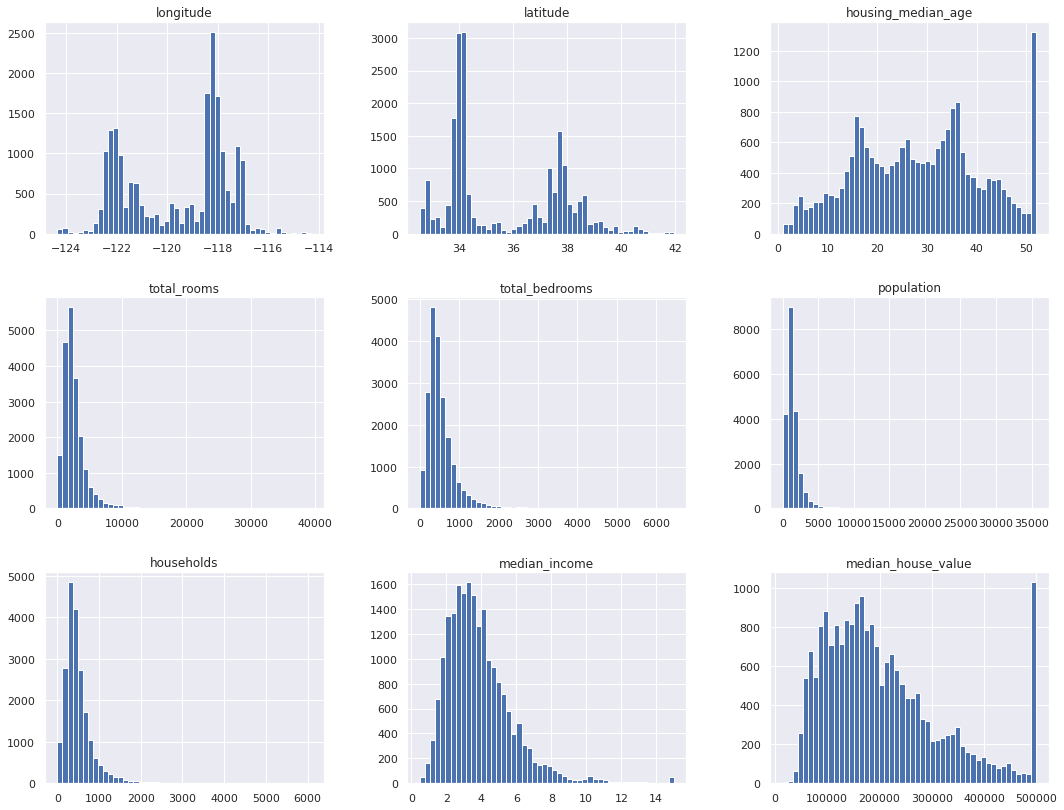

In [83]:
fig = plt.figure(figsize = (18,14))
ax = fig.gca()
df.hist(bins=50,ax=ax)
plt.show()

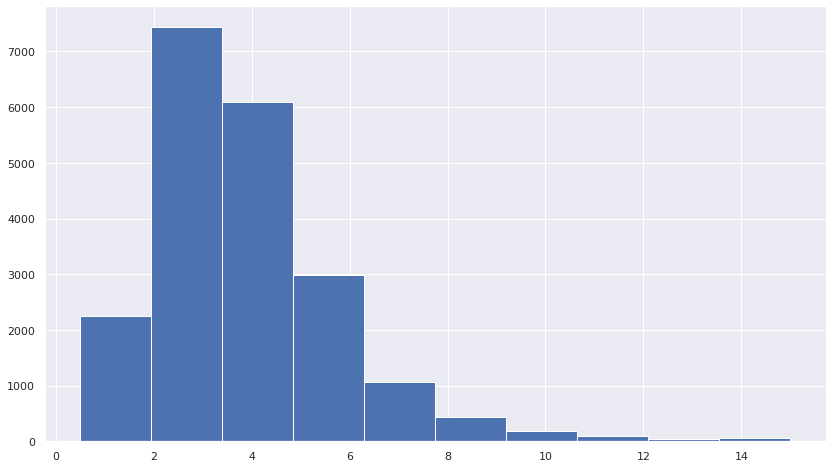

In [84]:
df['median_income'].hist()

In [85]:
# Finding the groups in median_income
df["income_cat"] = pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [86]:
df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

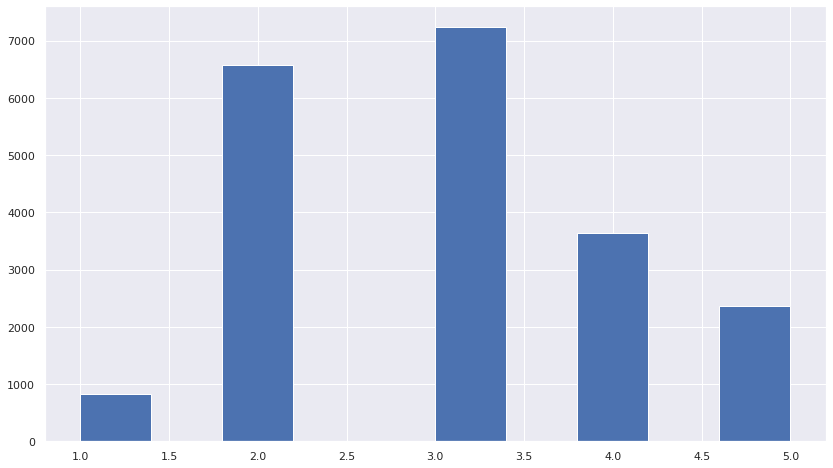

In [87]:
df['income_cat'].hist()

In [88]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [89]:
help(StratifiedShuffleSplit)

Help on class StratifiedShuffleSplit in module sklearn.model_selection._split:

class StratifiedShuffleSplit(BaseShuffleSplit)
 |  Stratified ShuffleSplit cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a merge of StratifiedKFold and
 |  ShuffleSplit, which returns stratified randomized folds. The folds
 |  are made by preserving the percentage of samples for each class.
 |  
 |  Note: like the ShuffleSplit strategy, stratified random splits
 |  do not guarantee that all folds will be different, although this is
 |  still very likely for sizeable datasets.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default 10
 |      Number of re-shuffling & splitting iterations.
 |  
 |  test_size : float, int, None, optional (default=None)
 |      If float, should be between 0.0 and 1.0 and represent the proportion
 |      of the dataset to includ

In [90]:
len(strat_train_set)

16512

In [91]:
len(strat_test_set)

4128

In [92]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [93]:
df['income_cat'].value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({"Overall":income_cat_proportions(df),
                             "Stratified":income_cat_proportions(strat_test_set),
                             "Random":income_cat_proportions(test_set)}).sort_index()
compare_props["Rand .%error"] = 100 * compare_props['Random']/compare_props['Overall'] - 100
compare_props["Strat .%error"] = 100 * compare_props['Stratified']/compare_props['Overall'] -100
compare_props

,Overall,Stratified,Random,Rand .%error,Strat .%error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [96]:
for set in (strat_train_set,strat_test_set):
    set.drop("income_cat",axis=1,inplace=True)

# Discover and visualize the data to gain insights

In [97]:
training_set = strat_train_set.copy()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


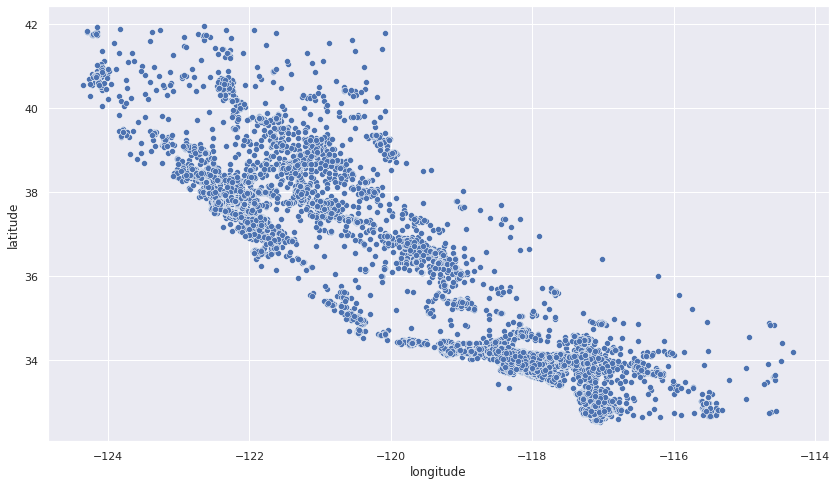

In [98]:
sns.scatterplot(training_set['longitude'],training_set['latitude'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


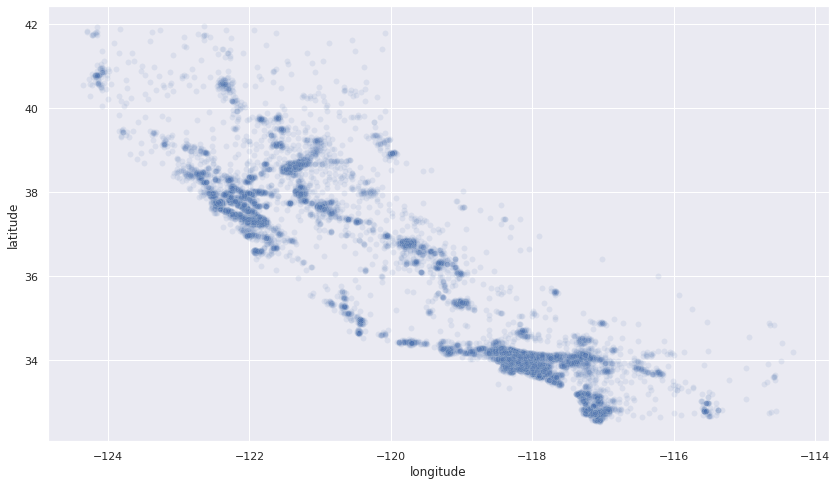

In [99]:
sns.scatterplot(training_set['longitude'],training_set['latitude'],alpha=0.1)

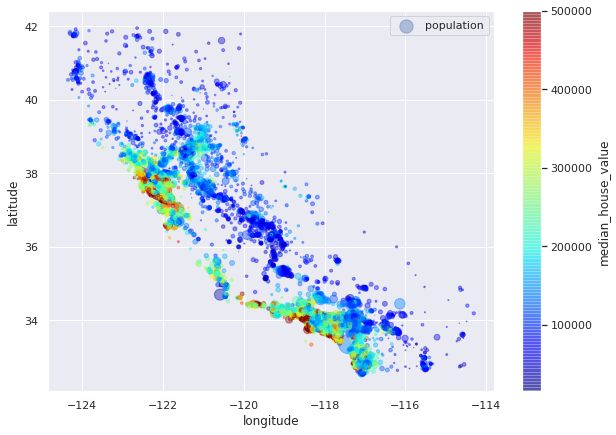

In [100]:
training_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=training_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

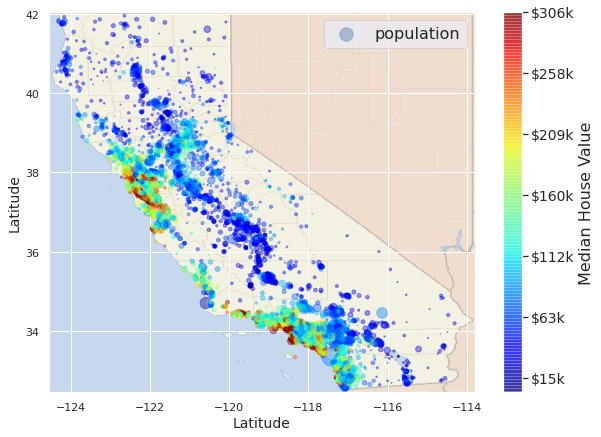

In [101]:
import matplotlib.image as mpimg
california_img = mpimg.imread(r"/content/drive/My Drive/Projects/California Housing/california.png")
ax =  training_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=training_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False,
    sharex=False)
plt.imshow(california_img,extent=[-124.55, -113.80, 32.45, 42.05],alpha=0.5,cmap=plt.get_cmap('jet'))
plt.ylabel('Latitude',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
prices = training_set['median_house_value']
tick_values = np.linspace(prices.min(),prices.max(),11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%round(v/1000) for v in tick_values],fontsize=14)
cbar.set_label('Median House Value',fontsize=16)
plt.legend(fontsize=16)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 16.0, 0.0, 550000.0)

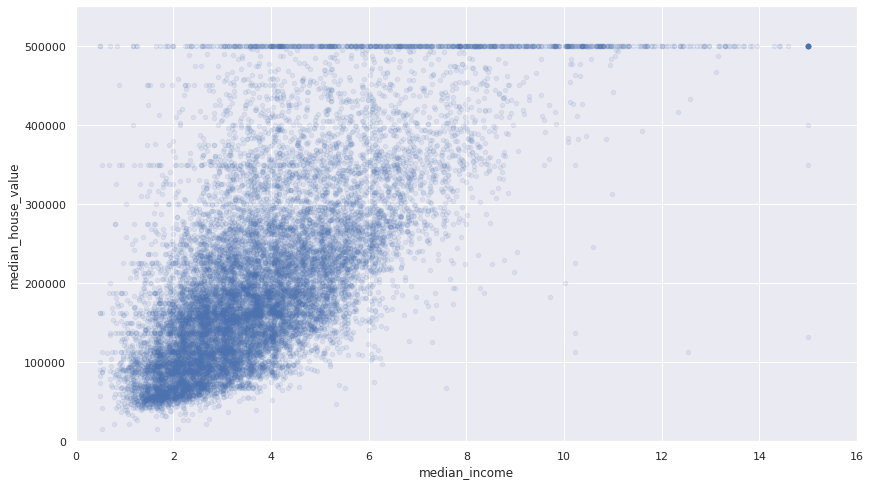

In [102]:
training_set.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [103]:
training_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [104]:
training_set["rooms_per_household"] = training_set["total_rooms"]/training_set["households"]
training_set["bedrooms_per_room"] = training_set["total_bedrooms"]/training_set["total_rooms"]
training_set["population_per_household"]=training_set["population"]/training_set["households"]

In [105]:
corr_matrix = training_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [106]:
training_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Preparing the data for machine leaning algorithms

In [107]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [108]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [109]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)

In [110]:
encoding_ocean = housing['ocean_proximity']
ocean =pd.get_dummies(encoding_ocean,drop_first=True)
ocean

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,0,0,0,0
18632,0,0,0,0
14650,0,0,0,1
3230,1,0,0,0
3555,0,0,0,0
...,...,...,...,...
6563,1,0,0,0
12053,1,0,0,0
13908,1,0,0,0
11159,0,0,0,0


In [111]:
housing_data = pd.concat((housing,ocean),axis=1)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,1,0,0,0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,1,0,0,0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,1,0,0,0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,0,0,0,0


In [112]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   INLAND              16512 non-null  uint8  
 10  ISLAND              16512 non-null  uint8  
 11  NEAR BAY            16512 non-null  uint8  
 12  NEAR OCEAN          16512 non-null  uint8  
dtypes: float64(8), object(1), uint8(4)
memory usage: 1.3+ MB


In [113]:
housing_data.drop('ocean_proximity',axis=1,inplace=True)

In [114]:
housing_test = strat_test_set.copy()

In [115]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [116]:
x_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [117]:
x_test['total_bedrooms'].fillna(433,inplace=True)

In [118]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


In [119]:
encoding_ocean_test = x_test['ocean_proximity']
ocean_test =pd.get_dummies(encoding_ocean_test,drop_first=True)
ocean_test


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,0,0,0,0
10970,0,0,0,0
20351,0,0,0,0
6568,1,0,0,0
13285,1,0,0,0
...,...,...,...,...
20519,1,0,0,0
17430,0,0,0,1
4019,0,0,0,0
12107,1,0,0,0


In [120]:
testing_data = pd.concat((x_test,ocean_test),axis=1)
testing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,0,0,0,0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN,0,0,0,0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN,0,0,0,0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND,1,0,0,0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,INLAND,1,0,0,0
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,NEAR OCEAN,0,0,0,1
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,<1H OCEAN,0,0,0,0
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,INLAND,1,0,0,0


In [121]:
testing_data.drop('ocean_proximity',axis=1,inplace=True)

In [122]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   INLAND              4128 non-null   uint8  
 9   ISLAND              4128 non-null   uint8  
 10  NEAR BAY            4128 non-null   uint8  
 11  NEAR OCEAN          4128 non-null   uint8  
dtypes: float64(8), uint8(4)
memory usage: 306.4 KB


# Feature scaling

In [123]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
housing_data.iloc[:,0:8] = sc.fit_transform(housing_data.iloc[:,0:8])
testing_data.iloc[:,0:8] = sc.transform(testing_data.iloc[:,0:8])

# linear regression

In [124]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(housing_data,housing_labels)
lin_pred = reg.predict(testing_data)

In [125]:
reg.score(testing_data,y_test)

0.6519743118997776

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
rmse = np.sqrt(mean_squared_error(y_test,lin_pred))
rmse

67344.97986797646

# Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_data,housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [129]:
forest_pred = forest_reg.predict(testing_data)

In [130]:
forest_reg.score(testing_data,y_test)

0.8275915277468209

In [131]:
rmse = np.sqrt(mean_squared_error(forest_pred,y_test))
rmse

47400.05861994726

# GridSearchCV

In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(housing_data, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [133]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [134]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42,max_features=8)
forest_reg.fit(housing_data,housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [135]:
forest_pred = forest_reg.predict(testing_data)

In [136]:
forest_reg.score(testing_data,y_test)

0.8307263726501365

In [137]:
rmse = np.sqrt(mean_squared_error(forest_pred,y_test))
rmse

46967.15213225328